<a href="https://colab.research.google.com/github/shahin1009/ModelOrderReduction/blob/main/Lab_2_Finite_Elements_(lab_solution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2 - Finite Elements in FEniCS**

The Finite Element Method (FEM) is a classical discretization technique that leverages on suitable (triangular) meshes to approximate a given spatial domain $\Omega\subset\mathbb{R}^{d}$, which in turn allows one to obtain a finite dimensional representation of any continuous function $u:\Omega\to\mathbb{R}$.

Here, we shall focus on Lagrangian Finite Elements, which exploit nodal evaluations to represent functions. For simplicity, we shall discuss the simplest case, which is that of **piece-wise linear continuous finite elements**.
</br></br>
Let $\Omega\subset\mathbb{R}^{d}$ be a bounded domain, and let $\{\mathbf{x}_{i}\}_{i=1}^{N_{h}}$ be the vertices of a suitable mesh defined over $\Omega$. Then, given a continuous function $u:\Omega\to\mathbb{R}$, we compute the **dof vector**

$$\mathbf{u}=\left[u(\mathbf{x}_{1}),\dots,u(\mathbf{x}_{N_{h}})\right]^\top\in\mathbb{R}^{N_{h}}.$$

The idea is that $\mathbf{u}$ constitutes a suitable representation of $u$. Clearly, this representation is not "complete", in the sense that, given $\mathbf{u}$ we cannot univocally determine $u$. However, if we restrict our attention to a smaller class of functions, $V_{h}\subset\mathcal{C}(\Omega)$, this correspondence becomes unique.

Let $\mathcal{M}=\{K_{j}\}_{j=1}^{m}$ be the computational mesh, listing all its elements (triangles) $K_{j}$. We define

$$V_{h}:=\left\{v\in\mathcal{C}(\Omega)\;\;\text{such that}\;\;\forall K_{j}\in\mathcal{M},\;\;v_{|K_{j}}\;\;\text{is linear}\right\}.$$

In other words, $V_{h}$ consists of all those functions that are linear across each element $K_{j}\in\mathcal{M}$. It is then straightforward to see that the correspondence


$$V_{h}\ni v\;\;\longleftrightarrow\;\;\mathbf{v}\in\mathbb{R}^{N_{h}}$$

is bijective, i.e.: each function in $v\in V_{h}$ has a unique dof representation, and this representation univocally determines $v$. Furthermore, one can prove that, for every $v\in V_{h}$ one has

$$v(\mathbf{x})=\sum_{i=1}^{N_{h}}v(\mathbf{x}_{i})\varphi_{i}(\mathbf{x}),$$

where $\{\varphi_{i}\}_{i=1}^{N_{h}}\subset V_{h}$ are the unique functions in $V_{h}$ for which $\varphi_{i}(\mathbf{x}_{j})=\delta_{i,j}.$ The latter are usually referred to as the *Lagrangian basis*.
</br>
</br></br>
</br>
In Python, all of this can be implemented using the **FEniCS** package.

# **Meshes, Finite Element spaces, dof representation**

To construct meshes, function spaces, and handle dof-representations, we rely on *FEniCS*.

Specifically, we leverage the implementation available within the *dlroms* package, which essentially simplifies some of the syntax. The *dlroms* package was developed at Polimi and it is freely available on Github.

In [ ]:
try:
     from dlroms import* # tries to access the dlroms package
except:
     !pip install --no-deps git+https://github.com/NicolaRFranco/dlroms.git # triggers the installation (if dlroms was not found)
     from dlroms import*

To start, let's create a simple mesh over the unit square

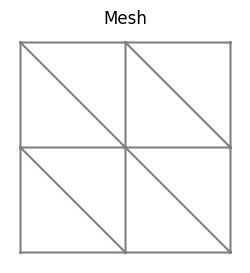

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

domain = fe.rectangle((0, 0), (1, 1))
mesh = fe.mesh(domain, structured = True, stepsize = np.sqrt(0.5))

plt.figure(figsize = (3,3))
fe.plot(mesh)
plt.title("Mesh")
plt.show()

Now, on top of this mesh, we construct a corresponding Finite Element space $V_{h}$.

In [ ]:
from IPython.display import clear_output as clc

Vh = fe.space(mesh, 'CG', 1)
clc()

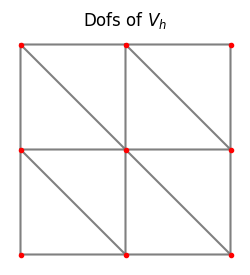

In [ ]:
vertices = fe.dofs(Vh)

plt.figure(figsize = (3,3))
fe.plot(mesh)
plt.plot(*vertices.T, '.r')
plt.title("Dofs of $V_h$")
plt.show()

As an example, let us define an element $u_h\in V_h$ and represent it. For instance, let's say that we would like $u_h$ to be a suitable interpolation of the function $u(x,y)=x^2+y^2.$

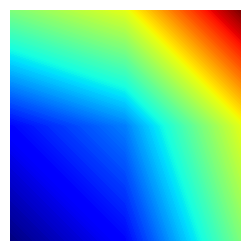

In [ ]:
u = lambda x: x[0]**2 + x[1]**2
u_h = fe.interpolate(u, Vh)

plt.figure(figsize = (3, 3))
fe.plot(u_h)
plt.show()

To better grasp the idea, let us also take a look at the dof representation of $u_{h}$

In [ ]:
uh = fe.dofs(u_h)
uh

array([2.  , 1.25, 1.25, 1.  , 0.5 , 1.  , 0.25, 0.25, 0.  ])

**REMARK**. In the dof representation, nodal values are listed according to criteria that are specific of the Finite Element space. In particular, they may be in a different order compared to the "mesh" perspective. See below.

In [ ]:
print("Vertices (mesh ordering)")
print(mesh.coordinates())

print("\n Vertices (Vh ordering)")
print(fe.dofs(Vh))

Vertices (mesh ordering)
[[0.  0. ]
 [1.  0. ]
 [1.  1. ]
 [0.  1. ]
 [0.5 0. ]
 [1.  0.5]
 [0.5 1. ]
 [0.  0.5]
 [0.5 0.5]]

 Vertices (Vh ordering)
[[1.  1. ]
 [1.  0.5]
 [0.5 1. ]
 [1.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [0.5 0. ]
 [0.  0.5]
 [0.  0. ]]


Last but not least, given a dof representation, we can easily revert back to its corresponding FE object (function).

In [ ]:
uf = fe.asfunction(uh, Vh) # we will get a function identical to u_h!

In [ ]:
x0 = [0.3472, 0.1892]
uf(x0)

np.float64(0.2682000000000003)

In [ ]:
u_h(x0)

np.float64(0.2682000000000003)

In [ ]:
u(x0)

0.15634448

<mark>**Exercise 1**</mark></br>
Using the syntax

     domain = fe.circle((0,0), 1)
     mesh = fe.mesh(domain, stepsize = 0.05)

create a suitable mesh defined over the unit circle $\Omega:=\{(x,y)\;:\;x^2+y^2<1\}$. Exploit the latter to construct a FE space $V_h$ of $\mathbb{P}$1-continuous Lagrangian elements.

1. What is the value of $N_{h}$? That is, how many degrees of freedom does the corresponding FE space $V_{h}$ have?

2. Plot the function $v(x,y)= \sin(\pi(x+4y^2))$ over $\Omega$.

3. Let $v_{h}\in V_{h}$ be the interpolant corresponding to $v$. Compare the values of $v_{h}$ and $v$ at the point $(0.5,0.3)$.


Nh = 1550.

v(x0)	= 0.426.
vh(x0)	= 0.422.


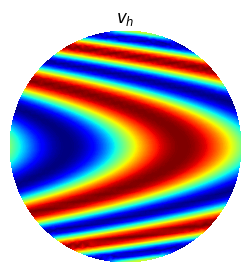

In [ ]:
domain = fe.circle((0,0), 1)
mesh = fe.mesh(domain, stepsize = 0.05)

Vh = fe.space(mesh, 'CG', 1)

print("Nh = %d.\n" % Vh.dim())

v = lambda x: np.sin(np.pi*(x[0]+4*x[1]**2))
v_h = fe.interpolate(v, Vh)

plt.figure(figsize = (3, 3))
fe.plot(v_h)
plt.title("$v_h$")

x0 = [0.5, 0.3]
print("v(x0)\t= %.3f." % v(x0))
print("vh(x0)\t= %.3f." % v_h(x0))

<mark>**Exercise 2**</mark></br>
Using the syntax

    domain = fe.circle((0,0), 1) - fe.circle((0,0), 0.5)
    mesh = fe.mesh(domain, stepsize = 0.5)

create a suitable mesh defined over the ring $\Omega:=\{(x,y)\;:0.25<\;x^2+y^2<1\}$.

1. Plot the mesh.

2. Using the calls
        Vh = fe.space(mesh, 'CG', 1)
        V2 = fe.space(mesh, 'CG', 2)
        Dh = fe.space(mesh, 'DG', 0)
create three Finite Element spaces: one for piece-wise linear continuous elements, one for **piece-wise quadratic continuous elements**, and one for **piece-wise constant discontinuous elements** (very useful for representing discontinuous functions). Compare the spatial distribution of the dofs in $V_h$, $V_2$ and $D_h$ using plots. What do the dofs of $V_h$ correspond to? What about $V_2$? and $D_h$?

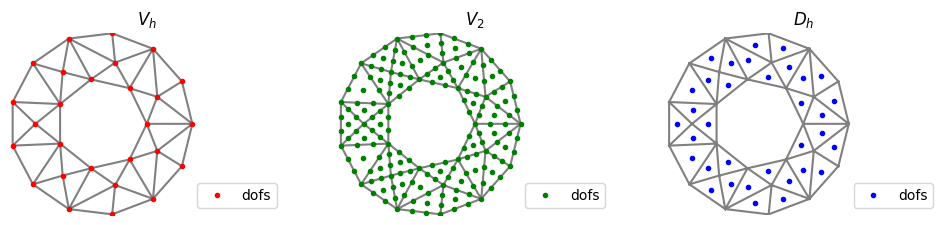

In [ ]:
domain = fe.circle((0,0), 1)-fe.circle((0,0), 0.5)
mesh = fe.mesh(domain, stepsize = 0.5)

Vh = fe.space(mesh, 'CG', 1)
V2 = fe.space(mesh, 'CG', 3)
Dh = fe.space(mesh, 'DG', 0)
clc()

plt.figure(figsize = (12, 4))
k = 0
for space, mark, title in zip([Vh, V2, Dh], [".r", ".g", ".b"], ["$V_h$", "$V_2$", "$D_h$"]):
  plt.subplot(1, 3, k+1)
  fe.plot(mesh)
  plt.plot(*fe.dofs(space).T, mark, label = 'dofs')
  plt.legend(loc = 'lower right')
  plt.title(title)
  plt.axis([-1, 2, -1, 1])
  plt.axis("off")
  k += 1
plt.show()

# **Solving PDEs with the Finite Element Method**

All of this is typically used as a setup for solving partial differential equations. Here, we shall see a very classical example concerning the diffusion equation.

Let $\Omega=(0,1)^2$ be the unit square. We aim at solving the following boundary value problem (steady PDE)

$$\begin{cases}
-\nabla\cdot(\sigma\nabla u)=f & \text{in}\;\Omega\\
-\sigma\nabla u\cdot\boldsymbol{n} = 0 & \text{on}\;\partial\Omega\setminus\Gamma_d\\
u=g & \text{on}\;\Gamma_{d}
\end{cases}
$$

where $\Gamma_{d}\subset\partial\Omega$ is the left edge, $f\equiv1$, $g\equiv 0$, whereas

$$\sigma(x,y)=\begin{cases}0.1 & x\in B\\10 & x\notin B\end{cases}$$

with $B\subset\Omega$ the disk of radius $0.2$ centered at $(0.3, 0.4)$.

To implemented the Finite Element Method, we introduce a suitable function space $V_{h}$, and re-write the problem in weak form,

$$\text{find}\;u_{h}\in V_{h}\;\text{s.t.}\;\int_{\Omega}\sigma\nabla u_h\cdot\nabla v_h = \int_{\Omega}fv_h\;\;\forall v_h\in V_{h}\;\;\text{and}\;\;u_{|\Gamma_d}=g_{|\Gamma_d}.$$

It can be shown that, when looked from the perspective of the degrees of freedom, this problem translates onto a linear system of the form

$$\mathbf{A}_h\mathbf{u}_h=\mathbf{f}_h$$

where $\mathbf{A}_h$ arises from the bilinear form $(u,v)\mapsto \int_{\Omega}\sigma\nabla u \cdot\nabla v$, later adjusted for Dirchlet boundary conditions.
</br>
</br>
</br>
Given a mesh, FEniCS allows us to assemble $\mathbf{A}_h$ and $\mathbf{f}_h$, which, consequently, allows us to find $\mathbf{u}_h$ (and thus $u_h$).

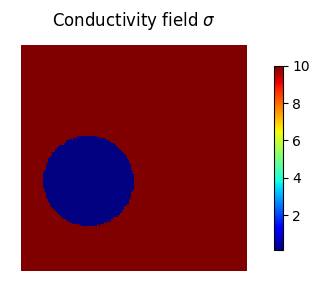

In [ ]:
domain = fe.rectangle((0, 0), (1, 1))
mesh = fe.mesh(domain, stepsize = 0.01, structured = True)

Vh = fe.space(mesh, 'CG', 1)
Dh = fe.space(mesh, 'DG', 0)

indicator = lambda x: ((x[0]-0.3)**2 + (x[1]-0.4)**2)**0.5 < 0.2
sigma = lambda x: 0.1*indicator(x) + 10*(1-indicator(x))
sigmah = fe.interpolate(sigma, Dh)

plt.figure(figsize = (4, 4))
fe.plot(sigmah, colorbar = True, shrink = 0.6)
plt.title("Conductivity field $\sigma$")
plt.show()

In [ ]:
# 1) Variational formulation
from fenics import dx, grad, inner

def a(u, v):
  return inner(sigmah*grad(u), grad(v))*dx

f = fe.interpolate(1.0, Vh)
def F(v):
  return f*v*dx

# 2) Assembling stage: from "continuous" objects to "algebraic" objects
Ah = fe.assemble(a, Vh)
fh = fe.assemble(F, Vh)
clc()

# 3) Taking Dirichlet boundary conditions into account
left_edge = lambda x: x[0] < 1e-16
bc = fe.DirichletBC(left_edge, 0.0)

Ah = fe.applyBCs(Ah, Vh, bc)
fh = fe.applyBCs(fh, Vh, bc)


# 4) Solution of the linear system
from scipy.sparse.linalg import spsolve
uh = spsolve(Ah, fh)

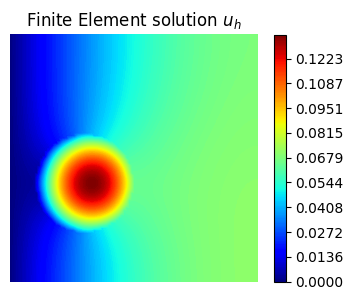

In [ ]:
# Visualization
plt.figure(figsize = (4, 4))
fe.plot(uh, Vh, colorbar = True)
plt.title("Finite Element solution $u_h$")
plt.show()

<mark>**Exercise 3 - Advection-Diffusion-Reaction (ADR)**</mark></br>
Consider the following (stationary) advection-diffusion-reaction,

$$\begin{cases}
-\nabla\cdot(\sigma\nabla u)+\boldsymbol{b}\cdot\nabla u + cu=f & \text{in}\;\Omega\\
-\sigma\nabla u\cdot\boldsymbol{n} = 0 & \text{on}\;\partial\Omega\setminus\Gamma_d\\
u=g & \text{on}\;\Gamma_{d},\\
\end{cases}
$$

where $\Omega=(0,1)^2$ is the unit square and $\Gamma_d\subset\partial\Omega$ is the left edge. Here,

$$\sigma\equiv0.01,\quad c\equiv1,\quad f\equiv0,\quad\boldsymbol{b}\equiv[1.0, 1.0]^\top,$$

are all constant in $(x,y)$, whereas $g(x,y)=\sin(4\pi y)^2$.

1. Approximate the solution to the ADR equation using the Finite Element Method with a structured triangular grid of stepsize $h=0.01$.

2. Compute the $L^{2}$-norm of the approximated solution $u_h$.

3. Compute the integral $\int_{\Omega}u_{h}$, where $u_h$ is the FEM solution.

</br></br>
*Hint 1: to declare the vector field b, use the syntax*

      Vb = fe.space(mesh, 'CG', 1, vector_valued = True)
      b = fe.interpolate(lambda x: [1.0, 1.0], Vb)

*Hint 2: to compute the $L^2$-norm, you can either: (a) use the $\textsf{norm}$ function available in FEniCS, or (b) assemble the mass matrix $\mathbf{M}$ associated to the bilinear form $(u,v)\mapsto\int_{\Omega}uv$ and observe that $\|u\|_{L^{2}}^{2}=\int_{\Omega}u^2=\mathbf{u}^\top\mathbf{M}\mathbf{u}$.*


*Hint 3: to compute the integral $\int_{\Omega}u_h$ you can leverage the mass matrix $\mathbf{M}$.*

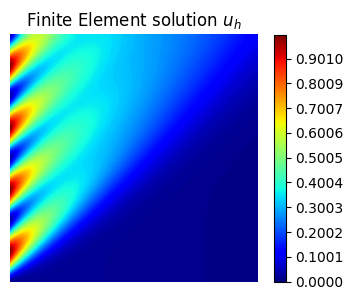

In [ ]:
## Mesh and FE space
domain = fe.rectangle((0, 0), (1, 1))
mesh = fe.mesh(domain, stepsize = 0.01)
Vh = fe.space(mesh, 'CG', 1)
Vb = fe.space(mesh, 'CG', 1, vector_valued = True)

## Variational formulation
def a_diff(u, v):
  return inner(grad(u), grad(v))*dx

b = fe.interpolate(lambda x: [1.0, 1.0], Vb)

def a_conv(u, v):
  return inner(b, grad(u))*v*dx

def a_reac(u, v):
  return u*v*dx

f = fe.asfunction(0.0, Vh)
def F(v):
  return f*v*dx

## Assembling
Adiff = fe.assemble(a_diff, Vh)
Aconv = fe.assemble(a_conv, Vh)
M = fe.assemble(a_reac, Vh)

Ah = 0.01*Adiff + Aconv + M
fh = fe.assemble(F, Vh)
clc()

## Boundary conditions
g = lambda x: np.sin(4*np.pi*x[1])**2
left_edge = lambda x: x[0] < 1e-16
bc = fe.DirichletBC(left_edge, g)

Ah = fe.applyBCs(Ah, Vh, bc)
fh = fe.applyBCs(fh, Vh, bc)

## Solving
uh = spsolve(Ah, fh)

## Visualization
plt.figure(figsize = (4, 4))
fe.plot(uh, Vh, cmap = 'jet', colorbar = True)
plt.title("Finite Element solution $u_h$")
plt.show()

In [ ]:
unorm = np.sqrt(uh @ M @ uh)
print("L2 norm of u_h: %.2e" % unorm)

L2 norm of u_h: 2.72e-01


In [ ]:
Nh = Vh.dim()

one = np.ones(Nh)
integral = one @ M @ uh
print("Integral of u_h over Omega: %.2e" % integral)

Integral of u_h over Omega: 1.95e-01


# Homeworks

<mark>**Exercise 4 (Handling Neumann conditions)**</mark></br>
Consider the following steady-diffusion equation,

$$\begin{cases}
-\nabla\cdot(\sigma\nabla u)=1 & \text{in}\;\Omega\\
-\sigma\nabla u\cdot\boldsymbol{n} = 1 & \text{on}\;\Gamma_{n}\\
-\sigma\nabla u\cdot\boldsymbol{n} = 0 & \text{on}\;\partial\Omega\setminus\left(\Gamma_{n}\cup\Gamma_d\right)\\
u=0 & \text{on}\;\Gamma_{d},\\
\end{cases}
$$

where $\Omega=(0,1)^2$ is the unit square, $\Gamma_d\subset\partial\Omega$ is the bottom edge and $\Gamma_n\subset\partial\Omega$ is the top edge. Here,

$$\sigma(x,y)=\begin{cases}0.1 & x<0.4\\10 & x\ge0.4.\end{cases}$$

Implement the Finite Element Method using a structured triangular grid of stepsize $h=0.02$.
</br></br>
*Hint 1: much like $\textsf{dx}$, in FEniCS we can import $\textsf{ds}$ to model line integrals.*

*Hint 2: when writing the variational formulation of the problem, the Nuemann term*

$$\int_{\Gamma_{n}}1\cdot v\;ds$$

*can be re-written as $\int_{\partial\Omega}\phi v\;ds$ where $\phi\equiv 1$ on $\Gamma_{n}$ and $\phi\equiv0$ on $\partial\Omega\setminus\Gamma_{n}$. For simplicity, you can  implement $\phi$ as an element of $V_{h}$.*

In [ ]:
# Domain setup
domain = fe.rectangle((0, 0), (1, 1))
mesh = fe.mesh(domain, stepsize = 0.02, structured = True)  # Change to h=0.02 as specified
Vh = fe.space(mesh, 'CG', 1)
Dh = fe.space(mesh, 'DG', 0)

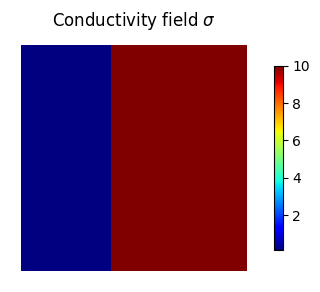

In [ ]:
# Define conductivity with discontinuity at x=0.4
indicator = lambda x: (x[0]) < 0.4
sigma = lambda x: 0.1*indicator(x) + 10*(1-indicator(x))
sigmah = fe.interpolate(sigma, Dh)


plt.figure(figsize = (4, 4))
fe.plot(sigmah, colorbar = True, shrink = 0.6)
plt.title("Conductivity field $\sigma$")
plt.show()

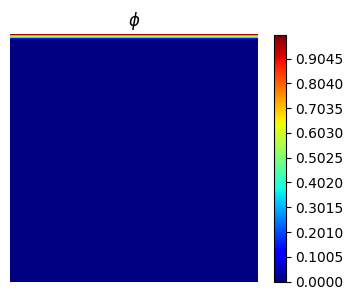

In [ ]:
## Define boundary parts
bottom_edge = lambda x: x[1] < 1e-14
top_edge = lambda x: x[1] - 1.0 < 1e-14
phi_func = lambda x: abs(x[1] - 1.0) < 1e-14
phi = fe.interpolate(phi_func, Vh)

plt.figure(figsize = (4, 4))
fe.plot(phi, colorbar = True)
plt.title("$\phi$")
plt.show()

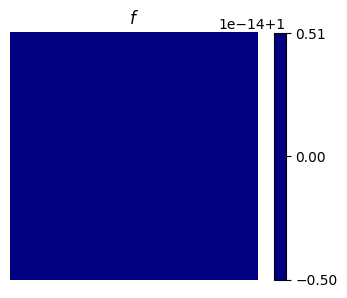

In [ ]:
f = fe.interpolate(1.0, Vh)  # Source term = 1 in Ω

plt.figure(figsize = (4, 4))
fe.plot(f, colorbar = True)
plt.title("$f$")
plt.show()

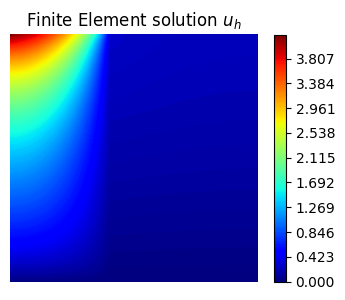

In [ ]:
from fenics import dx, ds, grad, inner

def a(u, v):
    return inner(sigmah*grad(u), grad(v))*dx


def F(v):
    return f*v*dx + phi*v*ds

# 2) Assembling stage
Ah = fe.assemble(a, Vh)

fh = fe.assemble(F, Vh)
clc()

# 3) Taking Dirichlet boundary conditions into account
bc = fe.DirichletBC(bottom_edge,0)  # u=0 on bottom edge
Ah = fe.applyBCs(Ah, Vh, bc)
fh = fe.applyBCs(fh, Vh, bc)


# 4) Solve the system
uh = spsolve(Ah, fh)

# 5) Visualize the solution
plt.figure(figsize = (4, 4))
fe.plot(uh, Vh, colorbar = True)
plt.title("Finite Element solution $u_h$")
plt.show()

<mark>**Exercise 5 - Parametrized Cookie Problem**</mark></br>
On the unit square $\Omega=(0,1)^2$, consider the following steady diffusion equation

$$\begin{cases}
-\nabla\cdot(\sigma_{\boldsymbol{\mu}}\nabla u)=1 & \text{in}\;\Omega\\
u=0 & \text{on}\;\partial\Omega
\end{cases}
$$

where $\boldsymbol{\mu}=[\mu_1,\mu_2,\mu_3,\mu_4]^\top$ is a vector of four scalar parameters, which parametrizes the conductivity field $\sigma=\sigma_\boldsymbol{\mu}$ as

$$\sigma_{\boldsymbol{\mu}}(x,y)=0.01+\sum_{i=1}^{4}\mu_i \mathbf{1}_{B_{i}}(x,y),$$

where $B_1,B_2,B_3,B_4\subset\Omega$ are the disk of radius $0.2$ centered at $(0.25, 0.25)$, $(0.25, 0.75)$, $(0.75, 0.25)$ and $(0.75, 0.75)$, respectively.
</br></br>
1. Fix a mesh of stepsize $h=0.02$. Construct a function called $\textsf{FOMsolver}$ that, given $\boldsymbol{\mu}$, computes the corresponding solution $u_{h}=u_{h,\boldsymbol{\mu}}$ to the diffusion equation. In particular, **the latter should return the dof-representation of the PDE solution**, $\mathbf{u}=\mathbf{u}_{\boldsymbol{\mu}}$.
</br></br>
For instance, once defined, you should be able to run the following code

       mu = np.array([0.02, 0.09, 2, 10])
       uh = FOMsolver(mu)
       fe.plot(uh, Vh)
(assuming that $V_h$ has been declared outside of the function's scope).

2. Generate 10 random simulations using the FOM solver, where each $\mu_i$ is sampled randomly in $[0, 10]$.
</br>How much does in take (in terms of computational time)?
</br></br>*Hint 1: you can generate random values between 0 and 1 using the $\textsf{rand}$ function in $\textsf{numpy.random}$.*
</br>*Hint 2: you can use the function $\textsf{perf_counter}$ from the $\textsf{time}$ package to measure time intervals.*

(np.float64(-0.05), np.float64(1.05), np.float64(-0.05), np.float64(1.05))

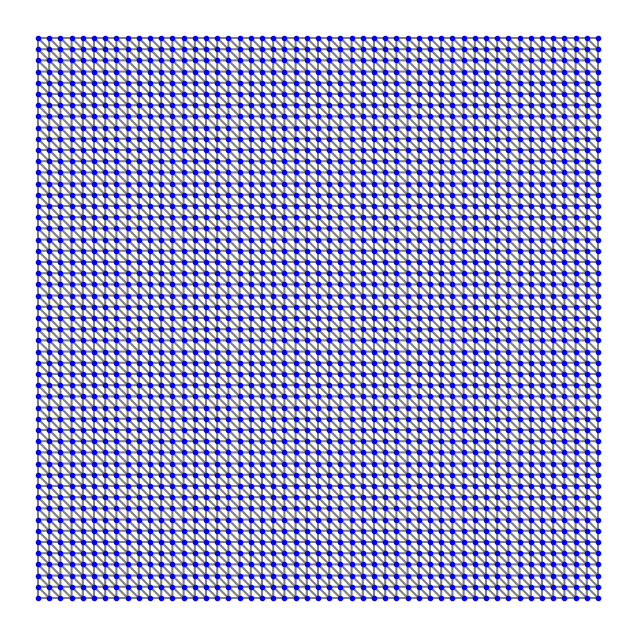

In [ ]:
domain = fe.rectangle((0, 0), (1, 1))
mesh = fe.mesh(domain, stepsize=0.02, structured=True)
Vh = fe.space(mesh, 'CG', 1)
Dh = fe.space(mesh, 'DG', 0)

plt.figure(figsize = (8, 8))
fe.plot(mesh)
plt.plot(*fe.dofs(Vh).T, mark, label = 'dofs')
plt.axis("off")

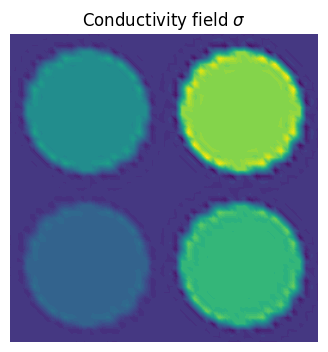

In [ ]:
def B1(x):
    return ((x[0]-0.25)**2 + (x[1]-0.25)**2) < 0.04  # Disk centered at (0.25, 0.25) with radius 0.2

def B2(x):
    return ((x[0]-0.25)**2 + (x[1]-0.75)**2) < 0.04  # Disk centered at (0.25, 0.75) with radius 0.2

def B3(x):
    return ((x[0]-0.75)**2 + (x[1]-0.25)**2) < 0.04  # Disk centered at (0.75, 0.25) with radius 0.2

def B4(x):
    return ((x[0]-0.75)**2 + (x[1]-0.75)**2) < 0.04

B1h = fe.interpolate(B1, Dh)
B2h = fe.interpolate(B2, Dh)
B3h = fe.interpolate(B3, Dh)
B4h = fe.interpolate(B4, Dh)
clc()
mu = np.array([1, 2, 3, 4])
sigma_mu = 0.01 + mu[0]*B1h + mu[1]*B2h + mu[2]*B3h + mu[3]*B4h


plt.figure(figsize = (4, 4))
fe.plot(sigma_mu, colorbar = True, shrink = 0.6)
plt.title("Conductivity field $\sigma$")
plt.show()


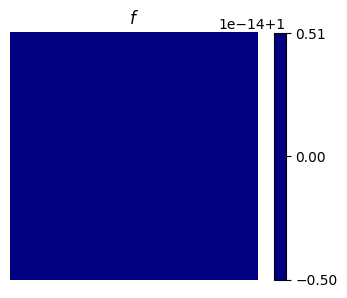

In [ ]:
f = fe.interpolate(1.0, Vh)

plt.figure(figsize = (4, 4))
fe.plot(f, colorbar = True)
plt.title("$f$")
plt.show()

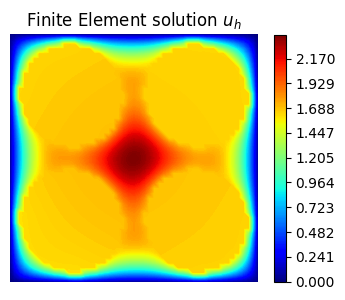

In [ ]:
def a(u, v):
    return inner(sigma_mu*grad(u), grad(v))*dx


def F(v):
    return f*v*dx

# Assembling the system
Ah = fe.assemble(a, Vh)
fh = fe.assemble(F, Vh)


def boundary(x):
    eps = 1e-14
    return np.logical_or.reduce([
        np.less(x[0], eps),
        np.greater(x[0], 1.0-eps),
        np.less(x[1], eps),
        np.greater(x[1], 1.0-eps)
    ])

# Apply Dirichlet boundary conditions
bc = fe.DirichletBC(boundary,0.0)

Ah = fe.applyBCs(Ah, Vh, bc)
fh = fe.applyBCs(fh, Vh, bc)

# Solve the linear system
uh = spsolve(Ah, fh)

plt.figure(figsize = (4, 4))
fe.plot(uh, Vh, colorbar = True)
plt.title("Finite Element solution $u_h$")
plt.show()

In [ ]:
from time import perf_counter
import time


def FOMsolver(mu):
    # Create the conductivity field sigma_mu
    sigma_mu = 0.01 + mu[0]*B1h + mu[1]*B2h + mu[2]*B3h + mu[3]*B4h

    # Define variational problem
    from fenics import dx, grad, inner

    def a(u, v):
        return inner(sigma_mu*grad(u), grad(v))*dx

    f = fe.interpolate(1.0, Vh)

    def F(v):
        return f*v*dx

    # Assembling the system
    Ah = fe.assemble(a, Vh)
    fh = fe.assemble(F, Vh)

    # Apply Dirichlet boundary conditions
    bc = fe.DirichletBC(boundary,0.0)
    Ah = fe.applyBCs(Ah, Vh, bc)
    fh = fe.applyBCs(fh, Vh, bc)
    clc()
    # Solve the linear system
    uh = spsolve(Ah, fh)

    return uh


def run_simulations(num_simulations=10):
    times = []
    solutions = []

    for i in range(num_simulations):
        # Generate random mu values between 0 and 10
        mu = 10 * np.random.rand(4)

        # Measure computation time
        start_time = time.perf_counter()
        uh = FOMsolver(mu)
        end_time = time.perf_counter()

        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        solutions.append((mu, uh))

        print(f"Simulation {i+1}/{num_simulations}: mu = {mu}, Time = {elapsed_time:.6f} seconds")

    avg_time = sum(times) / len(times)
    print(f"\nAverage computation time: {avg_time:.6f} seconds")
    print(f"Total computation time: {sum(times):.6f} seconds")

    return solutions, times

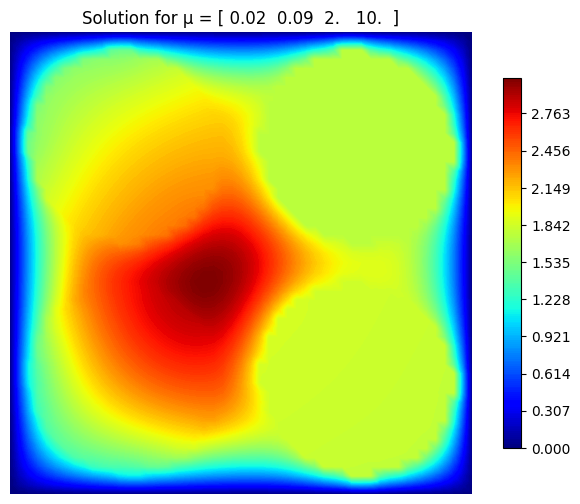

In [ ]:
mu_test = np.array([0.02, 0.09, 2, 10])
uh_test = FOMsolver(mu_test)

plt.figure(figsize=(8, 6))
fe.plot(uh_test, Vh, colorbar=True)
plt.title(f"Solution for μ = {mu_test}")
plt.show()


Simulation 10/10: mu = [1.68996857 9.63269152 4.20303424 7.89012146], Time = 1.069825 seconds

Average computation time: 1.212433 seconds
Total computation time: 12.124330 seconds


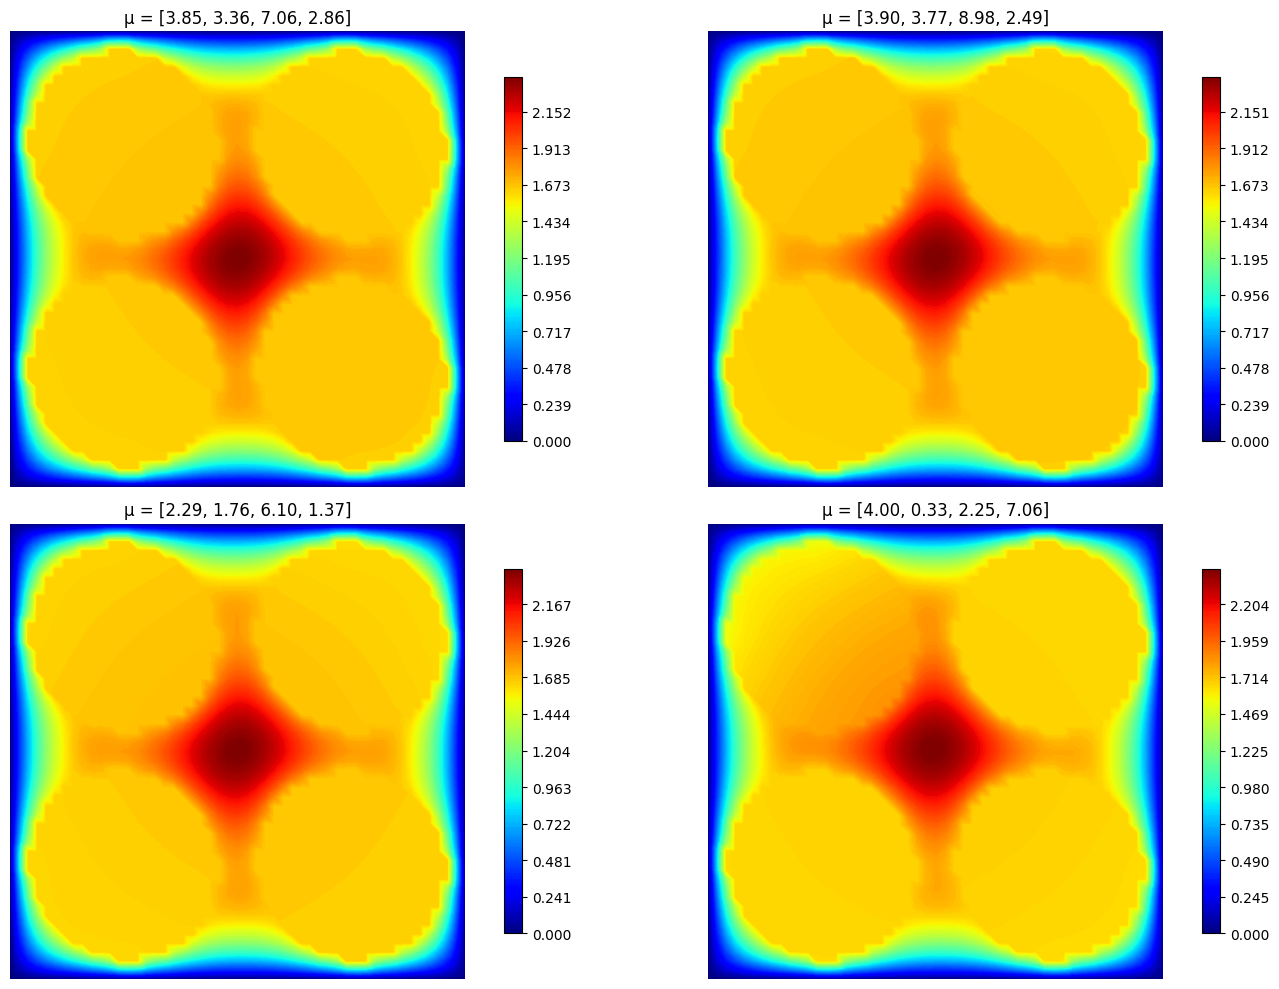

In [ ]:

# Run the simulations
print("Running 10 random simulations...")
solutions, times = run_simulations(10)

# Plot results from a few simulations
plt.figure(figsize=(15, 10))
for i in range(min(4, len(solutions))):
    plt.subplot(2, 2, i+1)
    mu, uh = solutions[i]
    fe.plot(uh, Vh, colorbar=True)
    plt.title(f"μ = [{mu[0]:.2f}, {mu[1]:.2f}, {mu[2]:.2f}, {mu[3]:.2f}]")

plt.tight_layout()
plt.show()

# Further references

**Remark 1 (FEniCS tutorials)**

The book "Solving PDEs in Python - The FEniCS tutorial I", which is freely available at

- https://link.springer.com/content/pdf/10.1007/978-3-319-52462-7.pdf (pdf)

contains a comprehensive list of different examples covering a broad spectrum of PDEs (nonlinear elasticity, Navier-Stokes, etc.), together with their implementation in FEniCS.

We mention, however, that since the book was published in 2017, a few things have changed. Consequently, some of the codes may require additional adjustments in order to be operational. Luckily, the community is still pretty active and, most of the times, you can easily solve potential issues by googling around (or asking ChatGPT!).

**However**, we also mention that users are now switching to $\textsf{FEniCSx}$, a new improved version of the original package. This can generate confusion, so beware. We won't use FEniCSx during the course as the package is fairly new and may be subject to substantial modifications along the way.

</br>
</br>

**Remark 2 (exporting / importing)**

While Python comes with many powerful packages, sometimes it is also useful to rely on external tools. For instance, one may want to use other tools for generating meshes (e.g., [TetGen](https://wias-berlin.de/software/tetgen/)) or visualizing solutions (e.g., [Paraview](https://www.paraview.org/) or [Pyvista](https://docs.pyvista.org/version/stable/)). Luckily, passing from one framework to another can be fairly simple. For instance:
- any mesh that is stored in ".xml" format can be readily imported in fenics via the following syntax
           mesh = fe.loadmesh("filename.xml")

- any function $u_h\in V_h$ constructed in fenics can be stored as a ".vtu" file, which can then be explored, for visualization, in Paraview. Leveraging the *dlroms* library, this can be achieved via
           fe.vtk(uh, Vh, "filename")
where $V_h$ is a FunctionSpace and $\mathbf{u}_{h}$ is a numpy array corresponding to the dof-representation of some $u_h\in V_h$.
</br>
</br>

**Remark 3 (other packages)**

Clearly, there are also other Python implementations of the FEM, aside from FEniCS. For instance, one such implementation is given by $\textsf{porepy}$, which comes with both basic and advanced features (e.g., mixed-dimensional spaces).

The package is freely accessible on Github: https://github.com/pmgbergen/porepy.
